### Netflix EDA
- 아래의 서비스에서 데이터를 수집하여 EDA를 수행하세요.


- flixpatrol 사이트에서 데이터 수집
    - `https://flixpatrol.com/top10/netflix/world/2021/full/#netflix-1`


- kaggle에서 netflix 컨텐츠 데이터 수집
    - `https://www.kaggle.com/shivamb/netflix-shows`


- 컨텐츠의 등급데이터는 아래의 코드 사용
```
ratings_ages = {'TV-PG': 'Older Kids', 'TV-MA': 'Adults', 'TV-Y7-FV': 'Older Kids',
                  'TV-Y7': 'Older Kids', 'TV-14': 'Teens', 'R': 'Adults', 'TV-Y': 'Kids',
                  'NR': 'Adults', 'PG-13': 'Teens', 'TV-G': 'Kids', 'PG': 'Older Kids',
                  'G': 'Kids', 'UR': 'Adults', 'NC-17': 'Adults'}
```

In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

### fixpatrol 사이트

### 2021 Top10

In [3]:
# 웹 서비스 분석(url)
url = 'https://flixpatrol.com/top10/streaming/world/2021/'

In [4]:
# request(url) > response(data) : data(html)

In [5]:
response = requests.get(url)
response

<Response [200]>

In [6]:
# data(html) > bs_obj.sleect(css-selecter) > text
dom = BeautifulSoup(response.text, "html.parser")

movie_elements = dom.select('#netflix-1 > div.-mx-content > div > div > table > tbody > tr')
print(len(movie_elements))

tvshow_elements = dom.select('#netflix-2 > div.-mx-content > div > div > table > tbody > tr')
print(len(tvshow_elements))

10
10


#### movie

In [7]:
# 각 데이터에서 필요한 정보 수집
# rank, name, point, link, date, company, genre, summary
movie_element = movie_elements[0]
data = {
    'rank' : movie_element.select_one('.font-semibold').text.split('.')[0],
    'name' : movie_element.select_one('a').text.strip(),
    'point' : movie_element.select_one('td.table-td.w-12.text-right.text-gray-400.font-semibold').text.split('.')[0],
    'link' : 'https://flixpatrol.com/'+movie_element.select_one('a').get('href'),

}
data

{'rank': '1',
 'name': 'Red Notice',
 'point': '25,918',
 'link': 'https://flixpatrol.com//title/red-notice/'}

In [8]:
datas = [{
            'rank' : movie_element.select_one('.font-semibold').text.split('.')[0],
            'name' : movie_element.select_one('a').text.strip(),
            'point' : movie_element.select_one('td.table-td.w-12.text-right.text-gray-400.font-semibold').text.split('.')[0],
            'link' : 'https://flixpatrol.com/'+movie_element.select_one('a').get('href'),} for movie_element in movie_elements]

movie_rank_df = pd.DataFrame(datas)
movie_rank_df

,rank,name,point,link
0,1,Red Notice,"25,918",https://flixpatrol.com//title/red-notice/
1,2,We Can Be Heroes,"25,311",https://flixpatrol.com//title/we-can-be-heroes...
2,3,Army of the Dead,"18,888",https://flixpatrol.com//title/army-of-the-dead/
3,4,Wish Dragon,"16,953",https://flixpatrol.com//title/wish-dragon/
4,5,Army of Thieves,"15,081",https://flixpatrol.com//title/army-of-thieves/
5,6,The Mitchells vs. The Machines,"14,902",https://flixpatrol.com//title/the-mitchells-vs...
6,7,Fatherhood,"14,660",https://flixpatrol.com//title/fatherhood/
7,8,The Unforgivable,"13,458",https://flixpatrol.com//title/the-unforgivable/
8,9,The Guilty,"12,930",https://flixpatrol.com//title/the-guilty-2021/
9,10,Yes Day,"12,809",https://flixpatrol.com//title/yes-day/


In [9]:
# date, company, genre, summary 수집
link = movie_rank_df.loc[0, 'link']
url = link
response = requests.get(url)
dom = BeautifulSoup(response.text, 'html.parser')
# dom
data = {
    'name' : dom.select_one('div.md\:flex.items-baseline.justify-between > h1').text,
    'date' : dom.select_one('div.flex.flex-wrap.text-gray-500 > div > span:nth-child(5) > span').text,
    'company' : dom.select_one('div.flex.flex-wrap.text-gray-500 > div > span:nth-child(7)').text.strip(),
    'genre' : dom.select_one('div.flex.flex-wrap.text-gray-500 > div > span:nth-child(9)').text,
    'summary' : dom.select_one('div.card.-mx-content > div:nth-child(1)').text.strip(),
}
data

{'name': 'Red Notice',
 'date': '11/12/2021',
 'company': 'Netflix',
 'genre': 'Action',
 'summary': "An Interpol-issued Red Notice is a global alert to hunt and capture the world's most wanted. But when a daring heist brings together the FBI's top profiler and two rival criminals, there's no telling what will happen."}

In [10]:
# date, genre, summary 수집
datas = []
for idx, movie in movie_rank_df.iterrows() :
    print(idx, end = ' ')
    url = movie['link']
    response = requests.get(url)
    dom = BeautifulSoup(response.text, 'html.parser')
    data = {
        'name' : dom.select_one('div.md\:flex.items-baseline.justify-between > h1').text,
        'date' : dom.select_one('div.flex.flex-wrap.text-gray-500 > div > span:nth-child(5) > span').text,
        'genre' : dom.select_one('div.flex.flex-wrap.text-gray-500 > div > span:nth-child(9)').text,
        'summary' : dom.select_one('div.card.-mx-content > div:nth-child(1)').text.strip(),
    }
    datas.append(data)
movie_info_df = pd.DataFrame(datas)
movie_info_df

0 1 2 3 4 5 6 7 8 9 

,name,date,genre,summary
0,Red Notice,11/12/2021,Action,An Interpol-issued Red Notice is a global aler...
1,We Can Be Heroes,12/25/2020,Adventure,When alien invaders capture Earth's superheroe...
2,Army of the Dead,05/14/2021,Action,"Following a zombie outbreak in Las Vegas, a gr..."
3,Wish Dragon,06/11/2021,Animated,"Din, a working-class college student, and Long..."
4,Army of Thieves,10/29/2021,Action,A mysterious woman recruits bank teller Ludwig...
5,The Mitchells vs. The Machines,04/30/2021,Animated,After Katie Mitchell is accepted into the film...
6,Fatherhood,06/18/2021,Comedy,"A widowed new dad copes with doubts, fears, he..."
7,The Unforgivable,12/10/2021,Drama,Released from prison into a society that won't...
8,The Guilty,10/01/2021,Crime,A troubled police detective demoted to 911 ope...
9,Yes Day,03/12/2021,Comedy,Parents attempt to make it through an entire d...


In [11]:
# movi_df와 movie_info_df merge
movie_df = pd.merge(movie_rank_df, movie_info_df, on='name')
movie_df

,rank,name,point,link,date,genre,summary
0,1,Red Notice,"25,918",https://flixpatrol.com//title/red-notice/,11/12/2021,Action,An Interpol-issued Red Notice is a global aler...
1,2,We Can Be Heroes,"25,311",https://flixpatrol.com//title/we-can-be-heroes...,12/25/2020,Adventure,When alien invaders capture Earth's superheroe...
2,3,Army of the Dead,"18,888",https://flixpatrol.com//title/army-of-the-dead/,05/14/2021,Action,"Following a zombie outbreak in Las Vegas, a gr..."
3,4,Wish Dragon,"16,953",https://flixpatrol.com//title/wish-dragon/,06/11/2021,Animated,"Din, a working-class college student, and Long..."
4,5,Army of Thieves,"15,081",https://flixpatrol.com//title/army-of-thieves/,10/29/2021,Action,A mysterious woman recruits bank teller Ludwig...
5,6,The Mitchells vs. The Machines,"14,902",https://flixpatrol.com//title/the-mitchells-vs...,04/30/2021,Animated,After Katie Mitchell is accepted into the film...
6,7,Fatherhood,"14,660",https://flixpatrol.com//title/fatherhood/,06/18/2021,Comedy,"A widowed new dad copes with doubts, fears, he..."
7,8,The Unforgivable,"13,458",https://flixpatrol.com//title/the-unforgivable/,12/10/2021,Drama,Released from prison into a society that won't...
8,9,The Guilty,"12,930",https://flixpatrol.com//title/the-guilty-2021/,10/01/2021,Crime,A troubled police detective demoted to 911 ope...
9,10,Yes Day,"12,809",https://flixpatrol.com//title/yes-day/,03/12/2021,Comedy,Parents attempt to make it through an entire d...


#### 데이터 > DataFrame function

In [12]:
def fixpatrol_data2dataFrame(elements) :
    datas = [{
            'rank' : element.select_one('.font-semibold').text.split('.')[0],
            'title' : element.select_one('a').text.strip(),
            'point' : element.select_one('td.table-td.w-12.text-right.text-gray-400.font-semibold').text.split('.')[0],
            'link' : 'https://flixpatrol.com/'+element.select_one('a').get('href'),} for element in elements]

    rank_df = pd.DataFrame(datas)
    
    datas = []
    for idx, element in rank_df.iterrows() :
        print(idx, end = ' ')
        url = element['link']
        response = requests.get(url)
        dom = BeautifulSoup(response.text, 'html.parser')
        data = {
            'title' : dom.select_one('div.md\:flex.items-baseline.justify-between > h1').text,
            'date' : dom.select_one('div.flex.flex-wrap.text-gray-500 > div > span:nth-child(5) > span').text,
            'genre' : dom.select_one('div.flex.flex-wrap.text-gray-500 > div > span:nth-child(9)').text,
            'summary' : dom.select_one('div.card.-mx-content > div:nth-child(1)').text.strip(),
        }
        datas.append(data)
    info_df = pd.DataFrame(datas)
    print()
    return pd.merge(rank_df, info_df, on='title')

In [13]:
movie_df = fixpatrol_data2dataFrame(movie_elements)
tvshow_df = fixpatrol_data2dataFrame(tvshow_elements)

0 1 2 3 4 5 6 7 8 9 
0 1 2 3 4 5 6 7 8 9 


In [14]:
movie_df.tail(2)

,rank,title,point,link,date,genre,summary
8,9,The Guilty,"12,930",https://flixpatrol.com//title/the-guilty-2021/,10/01/2021,Crime,A troubled police detective demoted to 911 ope...
9,10,Yes Day,"12,809",https://flixpatrol.com//title/yes-day/,03/12/2021,Comedy,Parents attempt to make it through an entire d...


In [15]:
tvshow_df.tail(2)

,rank,title,point,link,date,genre,summary
8,9,Yo soy Betty la fea,"29,271",https://flixpatrol.com//title/yo-soy-betty-la-...,10/25/1999,Cinderella Story,"Yo soy Betty, la fea is a telenovela filmed in..."
9,10,Maid,"29,008",https://flixpatrol.com//title/maid/,10/01/2021,Drama,"After fleeing an abusive relationship, a young..."


In [24]:
movie_df.to_csv('movie_top10.csv')

In [25]:
tvshow_df.to_csv('tvshow_top10.csv')

### Demographics

In [16]:
# 웹 서비스 분석(url)
url = 'https://flixpatrol.com/demographics/'

In [17]:
# request(url) > response(data) : data(html)

In [18]:
response = requests.get(url)
response

<Response [200]>

In [19]:
# data(html) > bs_obj.sleect(css-selecter) > text
dom = BeautifulSoup(response.text, "html.parser")

elements = dom.select('tr')
len(elements)

460

In [20]:
# 데이터 수집하기
# title point, link
element = elements[5]
data = {
    'title' : element.select_one('div.group-hover\:underline').text.strip(),
    'point' : element.select_one('.tabular-nums').text,
    'link' : 'https://flixpatrol.com/'+element.select_one('a').get('href'),
}
data

{'title': 'Game of Thrones',
 'point': '48,498,800',
 'link': 'https://flixpatrol.com//title/game-of-thrones/'}

In [21]:
datas = [{'title' : element.select_one('div.group-hover\:underline').text.strip(),
        'point' : element.select_one('.tabular-nums').text,
        'link' : 'https://flixpatrol.com/'+element.select_one('a').get('href'),} for element in elements]
data_rank_df = pd.DataFrame(datas)
data_rank_df[:40]

,title,point,link
0,Friends,"335,308,900",https://flixpatrol.com//title/friends/
1,Supernatural,"86,940,500",https://flixpatrol.com//title/supernatural/
2,Bones,"57,555,200",https://flixpatrol.com//title/bones-2005/
3,Tom and Jerry,"54,567,900",https://flixpatrol.com//title/tom-and-jerry/
4,Vikings,"48,519,800",https://flixpatrol.com//title/vikings/
5,Game of Thrones,"48,498,800",https://flixpatrol.com//title/game-of-thrones/
6,Rio,"42,888,800",https://flixpatrol.com//title/rio/
7,Mr. Robot,"40,400,000",https://flixpatrol.com//title/mr-robot/
8,The Simpsons,"37,905,300",https://flixpatrol.com//title/the-simpsons/
9,Arrow,"34,078,400",https://flixpatrol.com//title/arrow/


In [22]:
link = data_rank_df.loc[0, 'link']
streaming_url = link + 'streaming/'
streaming_response = requests.get(streaming_url)
streaming_dom = BeautifulSoup(streaming_response.text, 'html.parser')
site_elements = streaming_dom.select('div.mb-14')
site_li = []
for site in site_elements :
    if site.get('id') :
        site_li.append(site.get('id').split('-')[-1])
#         print(site.get('id').split('-')[-1])
site_li

['amazon', 'google', 'hbo', 'itunes', 'netflix']

In [23]:
# 데이터 수집하기
# TV Show or Movie, date, genre, streaming_site, summary
link = data_rank_df.loc[3, 'link']
info_url = link
info_response = requests.get(info_url)
info_dom = BeautifulSoup(info_response.text, 'html.parser')

streaming_url = link + 'streaming/'
streaming_response = requests.get(streaming_url)
streaming_dom = BeautifulSoup(streaming_response.text, 'html.parser')
site_elements = streaming_dom.select('div.mb-14')
site_li = []
for site in site_elements :
    if site.get('id') :
        site_li.append(site.get('id').split('-')[-1])
info = info_dom.select_one('div.flex.flex-wrap.text-gray-500').text.split('|')
# print(info)
data = {
    'title' : info_dom.select_one('div.md\:flex.items-baseline.justify-between > h1').text,
    'Show' : info[0].strip(),
    'date' : info[2].strip(),
    'genre' : info[-2].strip(),
    'streaming_site' : site_li,
    'summary' : info_dom.select_one('div.card.-mx-content > div:nth-child(1)').text.strip()
}
data

{'title': 'Tom and Jerry',
 'Show': 'TV Show',
 'date': '02/10/1940',
 'genre': 'Animation',
 'streaming_site': [],
 'summary': 'Tom and Jerry is a series of theatrical animated cartoon films created by William Hanna and Joseph Barbera for Metro-Goldwyn-Mayer, centering on a rivalry between a cat and a mouse whose chases include slapstick comedy.'}

In [ ]:
for idx, data in data_rank_df[:30].iterrows() :
    print(idx, end = ' ')
    link = data['link']
    info_url = link
    info_response = requests.get(info_url)
    info_dom = BeautifulSoup(info_response.text, 'html.parser')

    streaming_url = link + 'streaming/'
    streaming_response = requests.get(streaming_url)
    streaming_dom = BeautifulSoup(streaming_response.text, 'html.parser')
    site_elements = streaming_dom.select('div.mb-14')
    site_li = []
    for site in site_elements :
        if site.get('id') :
            site_li.append(site.get('id').split('-')[-1])
    info = info_dom.select_one('div.flex.flex-wrap.text-gray-500').text.split('|')
    # print(info)
    data = {
        'title' : info_dom.select_one('div.md\:flex.items-baseline.justify-between > h1').text,
        'Show' : info[0].strip(),
        'date' : info[2].strip(),
        'genre' : info[-2].strip(),
        'streaming_site' : site_li,
        'summary' : info_dom.select_one('div.card.-mx-content > div:nth-child(1)').text.strip()
    }
    datas.append(data)
datas[:5]

In [33]:
# 460개의 데이터를 요청하기에 시간이 부족하여 40개만 읽어왔습니다.
import time

datas_df = []

for i in range(20) :
    datas = []
    for idx, data in data_rank_df[i*23:i*23+23].iterrows() :
        print(idx, end = ' ')
        link = data['link']
        info_url = link
        info_response = requests.get(info_url)
        info_dom = BeautifulSoup(info_response.text, 'html.parser')

        streaming_url = link + 'streaming/'
        streaming_response = requests.get(streaming_url)
        streaming_dom = BeautifulSoup(streaming_response.text, 'html.parser')
        site_elements = streaming_dom.select('div.mb-14')
        site_li = []
        for site in site_elements :
            if site.get('id') :
                site_li.append(site.get('id').split('-')[-1])
        info = info_dom.select_one('div.flex.flex-wrap.text-gray-500').text.split('|')
        # print(info)
        data = {
            'title' : info_dom.select_one('div.md\:flex.items-baseline.justify-between > h1').text,
            'Show' : info[0].strip(),
            'date' : info[2].strip(),
            'genre' : info[-2].strip(),
            'streaming_site' : site_li,
            'summary' : info_dom.select_one('div.card.-mx-content > div:nth-child(1)').text.strip()
        }
        datas.append(data)
    datas_df.append(pd.DataFrame(datas))
    time.sleep(1)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [73]:
data_info_df = pd.concat(datas_df, ignore_index=True)
' '.join(data_info_df.loc[27]['title'].split()[:-4])

'Frozen'

In [74]:
' '.join(data_info_df.loc[455]['title'].split()[:-4])

'Best Exotic Marigold Hotel'

In [75]:
for idx, data in data_info_df.iterrows() :
    if data['Show'] == 'Franchise' :
        data['title'] = ' '.join(data['title'].split()[:-4])

In [185]:
for idx, data in data_info_df.iterrows() :
    data['genre'] = ''.join(data['genre'].split())

In [186]:
data_info_df.tail()

,title,Show,date,genre,streaming_site,summary
455,Best Exotic Marigold Hotel,Franchise,2011 – 2015,2011–2015,[],"STARRING\nMaggie Smith, Judi Dench, Bill Nighy..."
456,All the King's Men,Movie,09/10/2006,09/10/2006,[itunes],The story of an idealist's rise to power in th...
457,The Constant Gardener,Movie,08/31/2005,Thriller,"[google, itunes, netflix]",Justin Quayle is a low-level British diplomat ...
458,Star Trek: Alternate Reality,Franchise,2009 – 2016,ScienceFiction,[],J.J. Abrams cinematic re-envisioning of the St...
459,Into the Woods,Movie,12/25/2014,Fantasy,[itunes],A witch conspires to teach important lessons t...


In [188]:
data_rank_df.tail()

,title,point,link
455,Best Exotic Marigold Hotel,"32,000",https://flixpatrol.com//franchise/best-exotic-...
456,All the King's Men,"30,000",https://flixpatrol.com//title/all-the-kings-men/
457,The Constant Gardener,"24,000",https://flixpatrol.com//title/the-constant-gar...
458,Star Trek: Alternate Reality,"21,000",https://flixpatrol.com//franchise/star-trek-al...
459,Into the Woods,0,https://flixpatrol.com//title/into-the-woods/


In [189]:
data_df = pd.merge(data_rank_df, data_info_df, on='title')
data_df.tail()

,title,point,link,Show,date,genre,streaming_site,summary
465,Best Exotic Marigold Hotel,"32,000",https://flixpatrol.com//franchise/best-exotic-...,Franchise,2011 – 2015,2011–2015,[],"STARRING\nMaggie Smith, Judi Dench, Bill Nighy..."
466,All the King's Men,"30,000",https://flixpatrol.com//title/all-the-kings-men/,Movie,09/10/2006,09/10/2006,[itunes],The story of an idealist's rise to power in th...
467,The Constant Gardener,"24,000",https://flixpatrol.com//title/the-constant-gar...,Movie,08/31/2005,Thriller,"[google, itunes, netflix]",Justin Quayle is a low-level British diplomat ...
468,Star Trek: Alternate Reality,"21,000",https://flixpatrol.com//franchise/star-trek-al...,Franchise,2009 – 2016,ScienceFiction,[],J.J. Abrams cinematic re-envisioning of the St...
469,Into the Woods,0,https://flixpatrol.com//title/into-the-woods/,Movie,12/25/2014,Fantasy,[itunes],A witch conspires to teach important lessons t...


In [190]:
data_df.to_csv('demographics.csv')

#### EDA의 수행 절차
- 데이터 수집
- 결측 데이터의 처리
- 데이터 탐색
    - 수집한 데이터에서 자유롭게 주제를 선정하여 데이터 분석을 통한 인사이트 도출
    - 예시 : 인도영화는 다른 국가보다 러닝타임이 길것이다. 컨텐츠의 퀄리티가 가장 좋은 국가는?

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

#### 컨텐츠 타입과 컨텐츠 장르별 컨텐츠의 비율

In [85]:
movie_count = {}
for idx, movie in movie_df.iterrows() :
    genre = movie['genre']
    if genre not in movie_count.keys() :
        movie_count[genre] = 1
        continue
    movie_count[genre] += 1


In [86]:
tv_count = {}
for idx, tv in tvshow_df.iterrows() :
    genre = tv['genre']
    if genre not in tv_count.keys() :
        tv_count[genre] = 1
        continue
    tv_count[genre] += 1

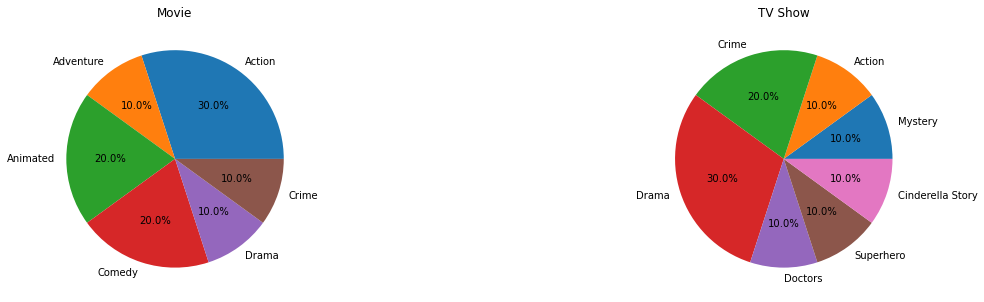

In [87]:
# 아래의 코드는 EDA의 예시를 보여주는 것으로 실제 코드가 동작되지 않습니다.

plt.figure(figsize=(20, 5))

plt.subplot(121)
plt.title("Movie")
plt.pie(movie_count.values(), labels=movie_count.keys(), autopct="%1.1f%%")

plt.subplot(122)
plt.title("TV Show")
plt.pie(tv_count.values(), labels=tv_count.keys(), autopct="%1.1f%%")

plt.show()

결론
* 영화는 액션 장르가 가장 인기가 있고 TV Show는 드라마 장르가 가장 인기가 많다.
* 영화보다는 TV Show에 더 다양한 장르를 시청한다.

#### 유명 콘텐츠의 넷플릭스 비중

In [88]:
data_df.head()

,title,point,link,Show,date,genre,streaming_site,summary
0,Friends,"335,308,900",https://flixpatrol.com//title/friends/,TV Show,09/22/1994,Comedy,"[amazon, google, hbo, itunes, netflix]",The misadventures of a group of friends as the...
1,Supernatural,"86,940,500",https://flixpatrol.com//title/supernatural/,TV Show,09/13/2005,Fantasy,"[amazon, google, itunes, netflix]","When they were boys, Sam and Dean Winchester l..."
2,Bones,"57,555,200",https://flixpatrol.com//title/bones-2005/,TV Show,09/13/2005,Crime,"[disney, google, itunes, plus]",Dr. Temperance Brennan and her colleagues at t...
3,Tom and Jerry,"54,567,900",https://flixpatrol.com//title/tom-and-jerry/,TV Show,02/10/1940,Animation,[],Tom and Jerry is a series of theatrical animat...
4,Vikings,"48,519,800",https://flixpatrol.com//title/vikings/,TV Show,03/03/2013,History,"[fandango, google, hbo, itunes, netflix]",Vikings follows the adventures of Ragnar Lothb...


In [89]:
site_count = {}
for idx, data in data_df.iterrows() :
    for site in data['streaming_site'] :
        if site not in site_count.keys() :
            site_count[site] = 1
            continue
        site_count[site] += 1
        
site_count

{'amazon': 46,
 'google': 134,
 'hbo': 79,
 'itunes': 189,
 'netflix': 109,
 'disney': 33,
 'plus': 27,
 'fandango': 16,
 'prime': 22,
 'hulu': 17,
 'vudu': 1}

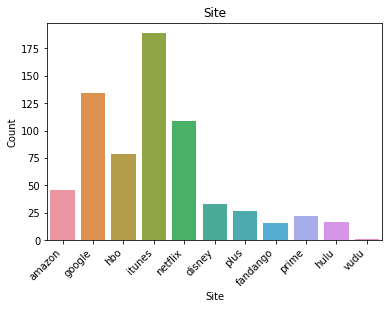

In [162]:
# 아래의 코드는 EDA의 예시를 보여주는 것으로 실제 코드가 동작되지 않습니다.
tmp = pd.DataFrame(list(site_count.items()), columns=['Site', 'Count'])

plt.title("Site")
g = sns.barplot(x="Site", y="Count", data=tmp)
g.set_xticklabels(g.get_xticklabels(), rotation=45,
                  horizontalalignment='right',
                  fontweight='light',
                 )
plt.show()

결론
* 유명 컨텐츠를 가지고 있는 사이트 중 2번째로 많은 컨텐츠를 기자고 있다.

In [91]:
data_df.head()

,title,point,link,Show,date,genre,streaming_site,summary
0,Friends,"335,308,900",https://flixpatrol.com//title/friends/,TV Show,09/22/1994,Comedy,"[amazon, google, hbo, itunes, netflix]",The misadventures of a group of friends as the...
1,Supernatural,"86,940,500",https://flixpatrol.com//title/supernatural/,TV Show,09/13/2005,Fantasy,"[amazon, google, itunes, netflix]","When they were boys, Sam and Dean Winchester l..."
2,Bones,"57,555,200",https://flixpatrol.com//title/bones-2005/,TV Show,09/13/2005,Crime,"[disney, google, itunes, plus]",Dr. Temperance Brennan and her colleagues at t...
3,Tom and Jerry,"54,567,900",https://flixpatrol.com//title/tom-and-jerry/,TV Show,02/10/1940,Animation,[],Tom and Jerry is a series of theatrical animat...
4,Vikings,"48,519,800",https://flixpatrol.com//title/vikings/,TV Show,03/03/2013,History,"[fandango, google, hbo, itunes, netflix]",Vikings follows the adventures of Ragnar Lothb...


In [191]:
tmp = data_df[data_df['Show']!='Franchise']
tmp[100:110]

,title,point,link,Show,date,genre,streaming_site,summary
128,Deception,"2,405,300",https://flixpatrol.com//title/deception-2018/,TV Show,03/11/2018,03/11/2018,[itunes],Cameron Black is the world's greatest illusion...
129,The Dark Knight,"2,395,900",https://flixpatrol.com//title/the-dark-knight/,Movie,07/16/2008,DC,"[prime, google, hbo, itunes, netflix]",Batman raises the stakes in his war on crime. ...
130,Westworld,"2,324,000",https://flixpatrol.com//title/westworld-2016/,TV Show,10/02/2016,ScienceFiction,"[google, hbo, itunes]",A dark odyssey about the dawn of artificial co...
131,Narcos,"2,276,000",https://flixpatrol.com//title/narcos/,TV Show,08/28/2015,Drama,[netflix],A gritty chronicle of the war against Colombia...
132,Alice in Wonderland,"2,264,300",https://flixpatrol.com//title/alice-in-wonderl...,Movie,03/03/2010,FantasyAdventure,"[hbo, itunes]","Alice, an unpretentious and individual 19-year..."
134,Alice in Wonderland,"1,852,000",https://flixpatrol.com//franchise/alice-in-won...,Movie,03/03/2010,FantasyAdventure,"[hbo, itunes]","Alice, an unpretentious and individual 19-year..."
137,Grimm,"2,189,600",https://flixpatrol.com//title/grimm/,TV Show,10/28/2011,Fantasy,"[google, itunes]",After Portland homicide detective Nick Burkhar...
138,Scrubs,"2,118,400",https://flixpatrol.com//title/scrubs/,TV Show,10/02/2001,Comedy,"[disney, google, itunes]","In the unreal world of Sacred Heart Hospital, ..."
140,His Dark Materials,"2,053,200",https://flixpatrol.com//title/his-dark-materials/,TV Show,11/03/2019,Fantasy,"[google, hbo, itunes]",Lyra is an orphan who lives in a parallel univ...
141,Supergirl,"2,039,300",https://flixpatrol.com//title/supergirl-2015/,TV Show,10/26/2015,Superhero,"[amazon, prime, google, hbo, itunes, netflix]","Twenty-four-year-old Kara Zor-El, who was take..."


In [192]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 0 to 469
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           237 non-null    object
 1   point           237 non-null    object
 2   link            237 non-null    object
 3   Show            237 non-null    object
 4   date            237 non-null    object
 5   genre           237 non-null    object
 6   streaming_site  237 non-null    object
 7   summary         237 non-null    object
dtypes: object(8)
memory usage: 16.7+ KB


In [193]:
tmp.loc[128, 'genre'].isalpha()

False

In [194]:
tmp.loc[129, 'genre'].isalpha()

True

In [195]:
tmp = tmp[tmp['genre'].str.isalpha()]

In [200]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 0 to 469
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           225 non-null    object
 1   point           225 non-null    object
 2   link            225 non-null    object
 3   Show            225 non-null    object
 4   date            225 non-null    object
 5   genre           225 non-null    object
 6   streaming_site  225 non-null    object
 7   summary         225 non-null    object
dtypes: object(8)
memory usage: 15.8+ KB


In [197]:
show_genre = tmp.groupby(['Show', 'genre'], as_index=False)[['title']].count()

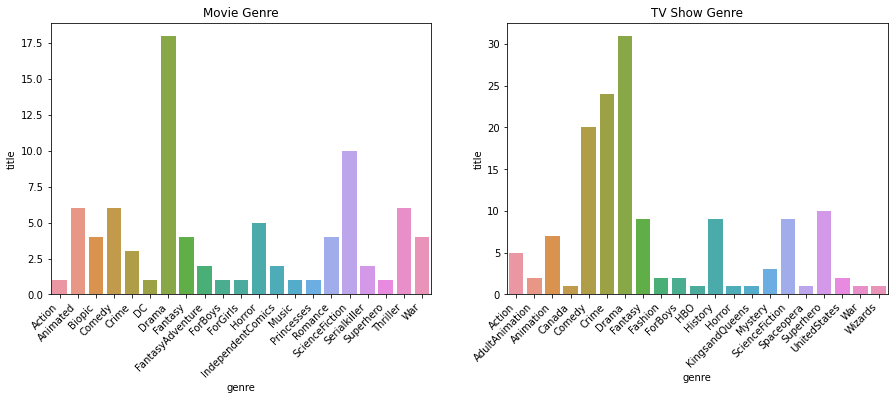

In [201]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Movie Genre')
g = sns.barplot(x="genre", y="title", data=show_genre[show_genre['Show']=='Movie'])
g.set_xticklabels(g.get_xticklabels(), rotation=45,
                  horizontalalignment='right',
                  fontweight='light',
                 )

plt.subplot(1, 2, 2)
plt.title('TV Show Genre')
g = sns.barplot(x="genre", y="title", data=show_genre[show_genre['Show']=='TV Show'])
g.set_xticklabels(g.get_xticklabels(), rotation=45,
                  horizontalalignment='right',
                  fontweight='light',
                 )

plt.show()

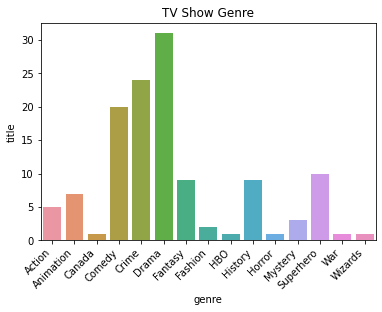

In [161]:
plt.title('TV Show Genre')
g = sns.barplot(x="genre", y="title", data=show_genre[show_genre['Show']=='TV Show'])
g.set_xticklabels(g.get_xticklabels(), rotation=45,
                  horizontalalignment='right',
                  fontweight='light',
                 )
plt.show()

아쉬운 점
* 460개의 데이터를 가지고 분석하지 못한 것
* summary로 word colud를 만들어 보지 못한 것
* 유명 컨텐츠를 영화, TV Show와 사이트 별로 나눠서 분석하지 못한 점

In [169]:
data_df.tail()

,title,point,link,Show,date,genre,streaming_site,summary
465,Best Exotic Marigold Hotel,"32,000",https://flixpatrol.com//franchise/best-exotic-...,Franchise,2011 – 2015,2011 – 2015,[],"STARRING\nMaggie Smith, Judi Dench, Bill Nighy..."
466,All the King's Men,"30,000",https://flixpatrol.com//title/all-the-kings-men/,Movie,09/10/2006,09/10/2006,[itunes],The story of an idealist's rise to power in th...
467,The Constant Gardener,"24,000",https://flixpatrol.com//title/the-constant-gar...,Movie,08/31/2005,Thriller,"[google, itunes, netflix]",Justin Quayle is a low-level British diplomat ...
468,Star Trek: Alternate Reality,"21,000",https://flixpatrol.com//franchise/star-trek-al...,Franchise,2009 – 2016,Science Fiction,[],J.J. Abrams cinematic re-envisioning of the St...
469,Into the Woods,0,https://flixpatrol.com//title/into-the-woods/,Movie,12/25/2014,Fantasy,[itunes],A witch conspires to teach important lessons t...


In [167]:
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [170]:
text = ''
for idx, data in data_df.iterrows() :
    text += data['summary'] + '\n'
    
text

'The misadventures of a group of friends as they navigate the pitfalls of work, life and love in Manhattan.\nWhen they were boys, Sam and Dean Winchester lost their mother to a mysterious and demonic supernatural force. Subsequently, their father raised them to be soldiers. He taught them about the paranormal evil that lives in the dark corners and on the back roads of America ... and he taught them how to kill it. Now, the Winchester brothers crisscross the country in their \'67 Chevy Impala, battling every kind of supernatural threat they encounter along the way.\nDr. Temperance Brennan and her\xa0colleagues at the Jeffersonian\'s Medico-Legal Lab assist Special Agent Seeley Booth\xa0with murder investigations when the remains are so badly decomposed, burned or destroyed that the standard identification methods are useless.\nTom and Jerry is a series of theatrical animated cartoon films created by William Hanna and Joseph Barbera for Metro-Goldwyn-Mayer, centering on a rivalry betwee

In [175]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
wordcloud = WordCloud(background_color='white').generate(text)

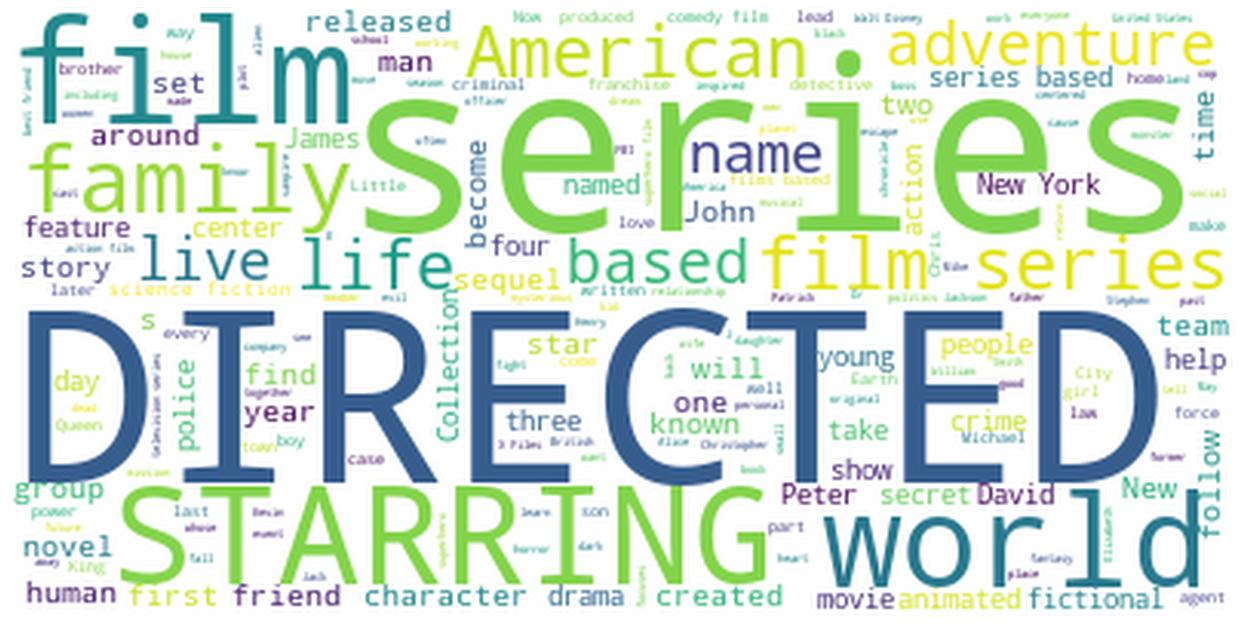

In [177]:
plt.figure(figsize=(22,22)) #이미지 사이즈 지정
plt.imshow(wordcloud, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거
plt.show() 

In [202]:
data_df.head()

,title,point,link,Show,date,genre,streaming_site,summary
0,Friends,"335,308,900",https://flixpatrol.com//title/friends/,TV Show,09/22/1994,Comedy,"[amazon, google, hbo, itunes, netflix]",The misadventures of a group of friends as the...
1,Supernatural,"86,940,500",https://flixpatrol.com//title/supernatural/,TV Show,09/13/2005,Fantasy,"[amazon, google, itunes, netflix]","When they were boys, Sam and Dean Winchester l..."
2,Bones,"57,555,200",https://flixpatrol.com//title/bones-2005/,TV Show,09/13/2005,Crime,"[disney, google, itunes, plus]",Dr. Temperance Brennan and her colleagues at t...
3,Tom and Jerry,"54,567,900",https://flixpatrol.com//title/tom-and-jerry/,TV Show,02/10/1940,Animation,[],Tom and Jerry is a series of theatrical animat...
4,Vikings,"48,519,800",https://flixpatrol.com//title/vikings/,TV Show,03/03/2013,History,"[fandango, google, hbo, itunes, netflix]",Vikings follows the adventures of Ragnar Lothb...


In [250]:
tmp = []
for idx, data in data_df.iterrows() :
    if 'netflix' in data['streaming_site'] :
        tmp.append(data)
        
tmp = pd.DataFrame(tmp)
tmp = tmp.reset_index()

In [251]:
tmp = tmp[tmp['genre'].str.isalpha()]

In [252]:
tmp.head()

,index,title,point,link,Show,date,genre,streaming_site,summary
0,0,Friends,"335,308,900",https://flixpatrol.com//title/friends/,TV Show,09/22/1994,Comedy,"[amazon, google, hbo, itunes, netflix]",The misadventures of a group of friends as the...
1,1,Supernatural,"86,940,500",https://flixpatrol.com//title/supernatural/,TV Show,09/13/2005,Fantasy,"[amazon, google, itunes, netflix]","When they were boys, Sam and Dean Winchester l..."
2,4,Vikings,"48,519,800",https://flixpatrol.com//title/vikings/,TV Show,03/03/2013,History,"[fandango, google, hbo, itunes, netflix]",Vikings follows the adventures of Ragnar Lothb...
3,6,Rio,"42,888,800",https://flixpatrol.com//title/rio/,Movie,04/15/2011,ForGirls,"[disney, itunes, netflix]",From the makers of the hit \Ice Age\ series co...
4,7,Mr. Robot,"40,400,000",https://flixpatrol.com//title/mr-robot/,TV Show,05/27/2015,Drama,"[prime, hbo, itunes, netflix]",A contemporary and culturally resonant drama a...


In [253]:
tmp["point"] = tmp["point"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
tmp['point'] = tmp['point'].astype(float)

In [254]:
table = tmp.groupby(['genre'], as_index=False)['point'].mean()

In [255]:
table.head()

,genre,point
0,Action,6.290040e+06
1,Animated,1.254680e+07
2,Animation,1.446097e+07
3,Biopic,1.201933e+06
4,Comedy,2.492945e+07


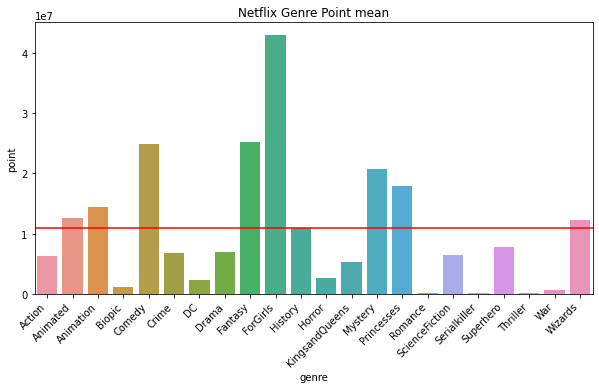

In [258]:
plt.figure(figsize=(10, 5))
plt.title('Netflix Genre Point mean')
g = sns.barplot(x="genre", y="point", data=table)
g.set_xticklabels(g.get_xticklabels(), rotation=45,
                  horizontalalignment='right',
                  fontweight='light',
                 )

plt.axhline(tmp['point'].mean(), color='r')

plt.show()

In [260]:
data_df.head()

,title,point,link,Show,date,genre,streaming_site,summary
0,Friends,"335,308,900",https://flixpatrol.com//title/friends/,TV Show,09/22/1994,Comedy,"[amazon, google, hbo, itunes, netflix]",The misadventures of a group of friends as the...
1,Supernatural,"86,940,500",https://flixpatrol.com//title/supernatural/,TV Show,09/13/2005,Fantasy,"[amazon, google, itunes, netflix]","When they were boys, Sam and Dean Winchester l..."
2,Bones,"57,555,200",https://flixpatrol.com//title/bones-2005/,TV Show,09/13/2005,Crime,"[disney, google, itunes, plus]",Dr. Temperance Brennan and her colleagues at t...
3,Tom and Jerry,"54,567,900",https://flixpatrol.com//title/tom-and-jerry/,TV Show,02/10/1940,Animation,[],Tom and Jerry is a series of theatrical animat...
4,Vikings,"48,519,800",https://flixpatrol.com//title/vikings/,TV Show,03/03/2013,History,"[fandango, google, hbo, itunes, netflix]",Vikings follows the adventures of Ragnar Lothb...
